# Exploratory Data Analysis in Python 
## Using libraries: Pandas and Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parking = pd.read_csv('parking.csv').copy()

In [3]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [4]:
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [5]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [6]:
parking['Total Parking Spaces'].min()

0

In [7]:
parking['Total Parking Spaces'].max()

6198

In [8]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

# 1) Distribution of owned/leased column

<BarContainer object of 9060 artists>

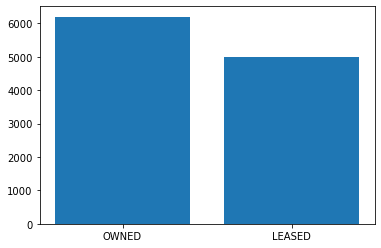

In [9]:
plt.bar(parking['Owned/Leased'], parking['Total Parking Spaces'])

In [10]:
owned_leased = pd.pivot_table(parking, index = 'Owned/Leased', values = 'Total Parking Spaces', aggfunc = 'sum')

In [11]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,310269
OWNED,158210


<AxesSubplot:xlabel='Owned/Leased'>

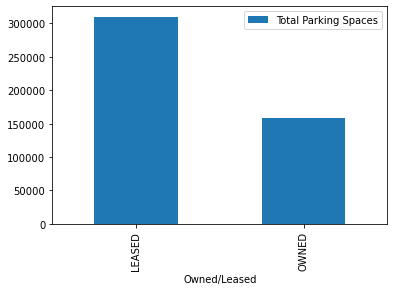

In [12]:
owned_leased.plot(kind = 'bar')

<BarContainer object of 2 artists>

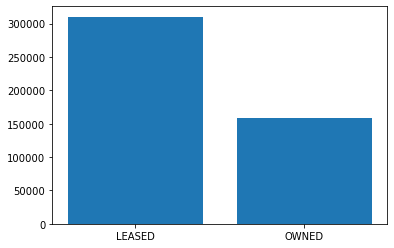

In [13]:
plt.bar(owned_leased.index, owned_leased['Total Parking Spaces'])

# 2) Bldg State with highest EXCESS parking

In [14]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [15]:
excess_parking = pd.pivot_table(parking, index = 'Bldg State', columns = 'Bldg Status', values = 'Total Parking Spaces')

In [16]:
excess_parking.head()

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.0
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.2


In [17]:
excess_parking = excess_parking[excess_parking.EXCESS > 0 ]

In [18]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


<AxesSubplot:xlabel='Bldg State'>

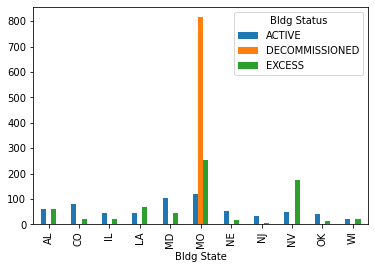

In [19]:
excess_parking.plot(kind = 'bar')

<BarContainer object of 11 artists>

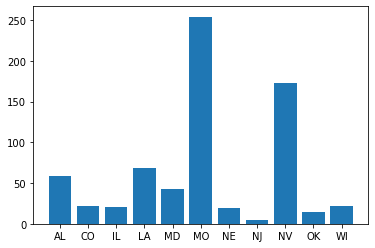

In [20]:
plt.bar(excess_parking.index, excess_parking.EXCESS)

In [21]:
excess_parking_sorted = excess_parking.EXCESS.sort_values()

In [22]:
excess_parking_sorted

Bldg State
NJ      4.300000
OK     14.000000
NE     19.000000
IL     21.000000
WI     22.000000
CO     22.200000
MD     43.166667
AL     59.000000
LA     68.666667
NV    173.000000
MO    254.272727
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

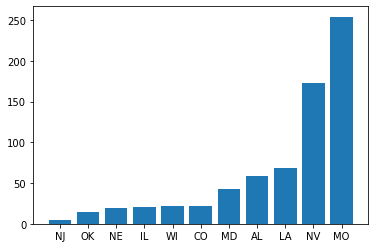

In [23]:
plt.bar(excess_parking_sorted.index, excess_parking_sorted.values)

# 3) Bldg Cities that have decommisioned along with total parking

In [24]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [25]:
decommissioned_parking_city = parking[parking['Bldg Status'] == 'DECOMMISSIONED']

In [26]:
decommissioned_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


# 4) Which property type is excessive

In [36]:
excess_property_type = pd.pivot_table(parking[parking['Bldg Status'] == 'EXCESS'], index = 'Property Type', values = 'Total Parking Spaces', aggfunc = 'mean')

In [37]:
excess_property_type

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


# 5) Where is the most active parking - Owned or Leased?

In [38]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [39]:
active_parking = pd.pivot_table(parking[parking['Bldg Status'] == 'ACTIVE'], index ='Owned/Leased', values = 'Total Parking Spaces')

In [40]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [41]:
active_parking.sum()

Total Parking Spaces    119.073346
dtype: float64

In [43]:
active_parking['Total Parking Spaces'] / active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [45]:
active_parking['%Contri'] =  active_parking['Total Parking Spaces'] / active_parking['Total Parking Spaces'].sum()

In [46]:
active_parking

,Total Parking Spaces,%Contri
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


# 6) States with higher proportion of leased parking

In [47]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [53]:
state_leased_parking = pd.pivot_table(parking[parking['Owned/Leased']=='LEASED'], index = 'Bldg State', values = 'Total Parking Spaces')

In [59]:
state_leased_parking.head()

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727


In [57]:
state_leased_parking.sort_values('Total Parking Spaces', ascending = False).head(5)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882


# 7) Which property type has the most active parking

In [71]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [68]:
property_type_parking = pd.pivot_table(parking[parking['Bldg Status'] == 'ACTIVE'] , index = 'Bldg City', values = 'Total Parking Spaces')

In [82]:
property_type_parking.sort_values('Total Parking Spaces', ascending = False)

,Total Parking Spaces
Bldg City,
BOYERS,1201.000000
LAGUNA NIGUEL,885.428571
ANDOVER,853.000000
HOLTSVILLE,777.250000
LANHAM,663.000000
...,...
BOONE,0.000000
BOOTHWYN,0.000000
MOSELEY,0.000000


# 8) Distribution of parking in city by property type

In [83]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [103]:
property_type_parking = pd.pivot_table(parking, index = ['Property Type'], aggfunc = 'sum')

In [122]:
property_type_parking_sorted = property_type_parking.sort_values('Total Parking Spaces', ascending = True)

<AxesSubplot:xlabel='Property Type'>

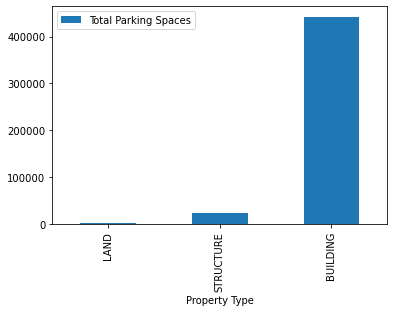

In [123]:
property_type_parking_sorted.plot(kind = 'bar')

# 9) Bldg Cities with no parking spaces 

In [124]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [135]:
pd.pivot_table(parking[parking['Total Parking Spaces'] == 0 ], index = 'Bldg City', values = 'Total Parking Spaces')

,Total Parking Spaces
Bldg City,
ABERDEEN,0
ABILENE,0
ABINGDON,0
ADA,0
AJO,0
...,...
YAKIMA,0
YORK,0
YORKTOWN,0


# 10) States with max and min parking spaces

In [136]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [140]:
total_parking_state = pd.pivot_table(parking, index = 'Bldg State', values = 'Total Parking Spaces', aggfunc = 'sum')
total_parking_state

,Total Parking Spaces
Bldg State,
AL,7729
AR,3071
AZ,7161
CA,45128
CO,18819
CT,1701
DC,20050
DE,441
FL,21437


In [155]:
min_max_total_parking_state = total_parking_state.sort_values('Total Parking Spaces').head(1)
min_max_total_parking_state

,Total Parking Spaces
Bldg State,
DE,441


In [153]:
max_total_parking_state = total_parking_state.sort_values('Total Parking Spaces', ascending = False).head(1)
max_total_parking_state

,Total Parking Spaces
Bldg State,
TX,48301
